## API

- Application programming interface

In [12]:
from dotenv import load_dotenv
import os, requests
import pandas as pd

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    function = "TIME_SERIES_INTRADAY"
    url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=5min&apikey={api_key}"
    data = requests.get(url).json()
    stock_list.append(data)


# json objekt är en massa "dictionaries i varandra"

#

In [14]:
stock_list  # Vi ser att stocklist har en dictionarie av meta data, sedan en annan. Det går att plocka ut olika värden härifrån


[{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
   '2. Symbol': 'AAPL',
   '3. Last Refreshed': '2022-11-04 20:00:00',
   '4. Interval': '5min',
   '5. Output Size': 'Compact',
   '6. Time Zone': 'US/Eastern'},
  'Time Series (5min)': {'2022-11-04 20:00:00': {'1. open': '138.0798',
    '2. high': '138.1800',
    '3. low': '138.0700',
    '4. close': '138.1200',
    '5. volume': '13042'},
   '2022-11-04 19:55:00': {'1. open': '138.1400',
    '2. high': '138.1400',
    '3. low': '138.0700',
    '4. close': '138.0700',
    '5. volume': '9587'},
   '2022-11-04 19:50:00': {'1. open': '138.1200',
    '2. high': '138.1300',
    '3. low': '138.0700',
    '4. close': '138.1200',
    '5. volume': '3695'},
   '2022-11-04 19:45:00': {'1. open': '138.1600',
    '2. high': '138.1600',
    '3. low': '138.1100',
    '4. close': '138.1200',
    '5. volume': '4015'},
   '2022-11-04 19:40:00': {'1. open': '138.1600',
    '2. high': '138.1700',
    '3. low': '

In [13]:

len(stock_list)

4

In [3]:
stock_list[0].keys()  # Man kan få ur första, man kan kolla vilka nycklar man har i denna dictionary


dict_keys(['Meta Data', 'Time Series (5min)'])

In [15]:
# datetime1: dict
# datetime2: dict
pd.DataFrame(stock_list[0]["Time Series (5min)"]).T.head()  # Transpondera, flyttat datum till index och index till columner


,1. open,2. high,3. low,4. close,5. volume
2022-11-04 20:00:00,138.0798,138.1800,138.0700,138.1200,13042
2022-11-04 19:55:00,138.1400,138.1400,138.0700,138.0700,9587
2022-11-04 19:50:00,138.1200,138.1300,138.0700,138.1200,3695
2022-11-04 19:45:00,138.1600,138.1600,138.1100,138.1200,4015
2022-11-04 19:40:00,138.1600,138.1700,138.1500,138.1700,4399


In [16]:
load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    function = "TIME_SERIES_INTRADAY"
    url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=60min&apikey={api_key}"
    data = requests.get(url).json()
    data = pd.DataFrame(data["Time Series (60min)"]).T
    stock_list.append(data)

In [17]:
df.info()   # Vi ser dtype objects, så vi kommer få typomandla t ex 4. close (du ser i output på cellen nedanför)

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2022-11-04 20:00:00 to 2022-10-27 17:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1. open    100 non-null    object
 1   2. high    100 non-null    object
 2   3. low     100 non-null    object
 3   4. close   100 non-null    object
 4   5. volume  100 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [18]:
df.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [19]:
df

,1. open,2. high,3. low,4. close,5. volume
2022-11-04 20:00:00,138.2200,138.2200,138.0700,138.1200,64681
2022-11-04 19:00:00,138.1900,138.2400,138.1300,138.2300,38808
2022-11-04 18:00:00,138.2000,138.3000,138.0700,138.2138,116813
2022-11-04 17:00:00,138.3900,138.6200,138.1200,138.2400,3410067
2022-11-04 16:00:00,136.7700,138.5000,136.6200,138.3900,20985511
...,...,...,...,...,...
2022-10-28 05:00:00,143.4516,146.1271,143.4516,146.0972,155019
2022-10-27 20:00:00,145.0589,145.7478,144.8592,145.1087,312666
2022-10-27 19:00:00,145.7377,147.0955,144.4799,144.9591,1018580
2022-10-27 18:00:00,143.0621,148.0040,139.1687,145.6080,5998211


In [20]:
load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbols = ["AAPL", "NVDA", "TSLA", "IBM"]
stock_list = []

for symbol in symbols:
    function = "TIME_SERIES_INTRADAY"
    url = f"https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval=60min&apikey={api_key}"
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (60min)"]).T
    series = df["4. close"].rename(symbol).astype(float)
    stock_list.append(series)

In [21]:
print(f"{len(stock_list) = }")
stock_list[:2]

len(stock_list) = 4


[2022-11-04 20:00:00    138.1200
 2022-11-04 19:00:00    138.2300
 2022-11-04 18:00:00    138.2138
 2022-11-04 17:00:00    138.2400
 2022-11-04 16:00:00    138.3900
                          ...   
 2022-10-28 05:00:00    146.0972
 2022-10-27 20:00:00    145.1087
 2022-10-27 19:00:00    144.9591
 2022-10-27 18:00:00    145.6080
 2022-10-27 17:00:00    142.9324
 Name: AAPL, Length: 100, dtype: float64,
 2022-11-04 20:00:00    141.75
 2022-11-04 19:00:00    141.60
 2022-11-04 18:00:00    141.64
 2022-11-04 17:00:00    141.29
 2022-11-04 16:00:00    141.80
                         ...  
 2022-10-28 05:00:00    130.12
 2022-10-27 20:00:00    130.56
 2022-10-27 19:00:00    130.40
 2022-10-27 18:00:00    130.75
 2022-10-27 17:00:00    130.29
 Name: NVDA, Length: 100, dtype: float64]

In [22]:
# concatenated a list of series into a dataframe
stocks = pd.concat(stock_list, axis="columns")
stocks

,AAPL,NVDA,TSLA,IBM
2022-11-04 20:00:00,138.1200,141.75,209.05,137.000
2022-11-04 19:00:00,138.2300,141.60,208.19,136.550
2022-11-04 18:00:00,138.2138,141.64,208.25,NaN
2022-11-04 17:00:00,138.2400,141.29,207.59,137.000
2022-11-04 16:00:00,138.3900,141.80,207.53,137.000
...,...,...,...,...
2022-10-26 14:00:00,NaN,NaN,NaN,135.610
2022-10-26 13:00:00,NaN,NaN,NaN,135.350
2022-10-26 12:00:00,NaN,NaN,NaN,135.735
2022-10-26 11:00:00,NaN,NaN,NaN,135.280


In [23]:
import plotly.express as px

px.line(
    stocks,
    x=stocks.index,
    y=symbols,
    labels={"variable": "Stock", "value": "Value in (USD)", "index": "Date"},
    title="Stocks in one week",
)

## Working with time series

In [24]:
#print(stocks.index.dtype)

# convert dtype object to datetime
stocks.index = pd.to_datetime(stocks.index)
print(stocks.index.dtype)
stocks.head()

datetime64[ns]


,AAPL,NVDA,TSLA,IBM
2022-11-04 20:00:00,138.1200,141.75,209.05,137.00
2022-11-04 19:00:00,138.2300,141.60,208.19,136.55
2022-11-04 18:00:00,138.2138,141.64,208.25,NaN
2022-11-04 17:00:00,138.2400,141.29,207.59,137.00
2022-11-04 16:00:00,138.3900,141.80,207.53,137.00


In [25]:
stocks.loc["2022"]

,AAPL,NVDA,TSLA,IBM
2022-11-04 20:00:00,138.1200,141.75,209.05,137.000
2022-11-04 19:00:00,138.2300,141.60,208.19,136.550
2022-11-04 18:00:00,138.2138,141.64,208.25,NaN
2022-11-04 17:00:00,138.2400,141.29,207.59,137.000
2022-11-04 16:00:00,138.3900,141.80,207.53,137.000
...,...,...,...,...
2022-10-26 14:00:00,NaN,NaN,NaN,135.610
2022-10-26 13:00:00,NaN,NaN,NaN,135.350
2022-10-26 12:00:00,NaN,NaN,NaN,135.735
2022-10-26 11:00:00,NaN,NaN,NaN,135.280


In [26]:
stocks.loc["2022-10-28"] # extracts all rows with date 2022-10-28

,AAPL,NVDA,TSLA,IBM
2022-10-28 20:00:00,155.5714,138.7900,228.3500,NaN
2022-10-28 19:00:00,155.5415,138.8800,228.3500,138.52
2022-10-28 18:00:00,155.6812,138.7300,228.4457,NaN
2022-10-28 17:00:00,156.0406,138.8600,228.7000,138.53
2022-10-28 16:00:00,155.4516,138.3400,228.4500,138.53
2022-10-28 15:00:00,155.8659,137.1600,228.5600,138.73
2022-10-28 14:00:00,156.1903,136.9200,226.1550,138.51
2022-10-28 13:00:00,156.4864,137.3501,225.1600,138.33
2022-10-28 12:00:00,154.8227,136.1400,224.7200,138.04
2022-10-28 11:00:00,155.4766,134.4800,222.8000,138.37


In [27]:
stocks.sort_index().loc["2022-10-27":"2022-10-31"]

,AAPL,NVDA,TSLA,IBM
2022-10-27 07:00:00,NaN,NaN,NaN,135.0100
2022-10-27 09:00:00,NaN,NaN,NaN,135.1500
2022-10-27 10:00:00,NaN,NaN,NaN,135.4000
2022-10-27 11:00:00,NaN,NaN,NaN,135.6300
2022-10-27 12:00:00,NaN,NaN,NaN,135.2200
2022-10-27 13:00:00,NaN,NaN,NaN,135.4200
2022-10-27 14:00:00,NaN,NaN,NaN,134.6400
2022-10-27 15:00:00,NaN,NaN,NaN,134.7100
2022-10-27 16:00:00,NaN,NaN,NaN,134.9100
2022-10-27 17:00:00,142.9324,130.2900,221.0000,134.5200


In [28]:
from datetime import datetime, timedelta

now = datetime.now()
last_week = (now-timedelta(7)).strftime("%Y-%m-%d")
now = str(now.date())

print(f"{last_week = }")
print(f"{now = }")

stocks.sort_index().loc[last_week:now]

last_week = '2022-10-31'
now = '2022-11-07'


,AAPL,NVDA,TSLA,IBM
2022-10-31 05:00:00,154.4233,136.73,225.88,NaN
2022-10-31 06:00:00,154.5232,137.01,225.82,NaN
2022-10-31 07:00:00,154.5431,137.10,225.95,NaN
2022-10-31 08:00:00,154.3535,137.99,227.30,138.1900
2022-10-31 09:00:00,153.5348,137.38,226.80,138.1069
...,...,...,...,...
2022-11-04 16:00:00,138.3900,141.80,207.53,137.0000
2022-11-04 17:00:00,138.2400,141.29,207.59,137.0000
2022-11-04 18:00:00,138.2138,141.64,208.25,NaN
2022-11-04 19:00:00,138.2300,141.60,208.19,136.5500


## Subplots in 2x2 figure

- only some tips

axes.shape = (2, 2)
axes.dtype = dtype('O')
axes = array([[<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >]], dtype=object)
axes.flatten() = array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >],
      dtype=object)
axes.flatten().shape = (4,)


Text(0.5, 1.05, 'A few tech stocks')

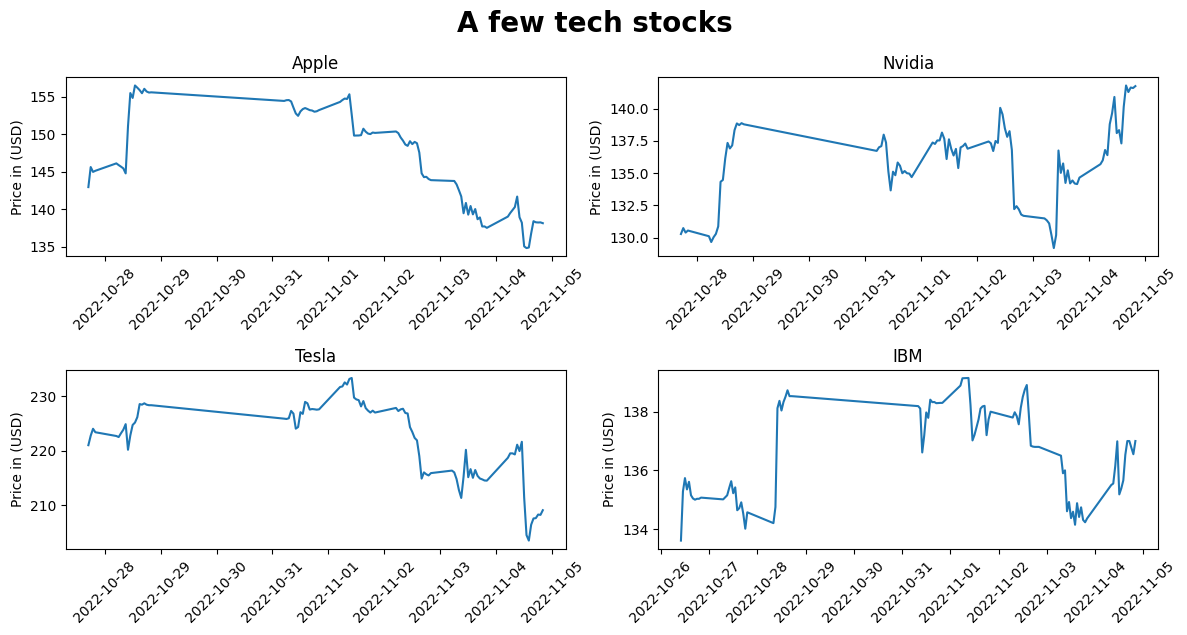

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns 


fig, axes = plt.subplots(2,2, figsize = (12,6))

print(f"{axes.shape = }")
print(f"{axes.dtype = }")
print(f"{axes = }")
print(f"{axes.flatten() = }")
print(f"{axes.flatten().shape = }")

stock_names = {"AAPL": "Apple", "NVDA": "Nvidia", "TSLA": "Tesla", "IBM": "IBM"}

for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data = stocks, x = stocks.index, y = symbol, ax = ax)
    ax.set(title = f"{stock_names[symbol]}", ylabel="Price in (USD)")
    ax.tick_params(axis = "x", rotation = 45)

fig.tight_layout()
fig.suptitle("A few tech stocks", y = 1.05, fontweight = "bold", fontsize=20)